=== Codec-wise PESQ Statistics ===
g711 (Tor):
  Total calls     : 10041
  >3.0 PESQ       : 2252 (22.43%)
  Mean PESQ       : 2.62
  Q1-Q2-Q3        : 2.39, 2.74, 2.98

g711 (Non-Tor):
  Total calls     : 3699
  >3.0 PESQ       : 3418 (92.40%)
  Mean PESQ       : 3.40
  Q1-Q2-Q3        : 3.51, 3.57, 3.62

gsm (Tor):
  Total calls     : 5622
  >3.0 PESQ       : 64 (1.14%)
  Mean PESQ       : 1.91
  Q1-Q2-Q3        : 1.62, 1.94, 2.12

gsm (Non-Tor):
  Total calls     : 546
  >3.0 PESQ       : 0 (0.00%)
  Mean PESQ       : 2.40
  Q1-Q2-Q3        : 2.32, 2.45, 2.49

opus (Tor):
  Total calls     : 5674
  >3.0 PESQ       : 3115 (54.90%)
  Mean PESQ       : 2.88
  Q1-Q2-Q3        : 1.93, 3.16, 3.78

opus (Non-Tor):
  Total calls     : 550
  >3.0 PESQ       : 549 (99.82%)
  Mean PESQ       : 4.34
  Q1-Q2-Q3        : 4.26, 4.38, 4.49

speex (Tor):
  Total calls     : 4952
  >3.0 PESQ       : 98 (1.98%)
  Mean PESQ       : 2.20
  Q1-Q2-Q3        : 2.01, 2.29, 2.49

speex (Non-Tor):
  Total cal

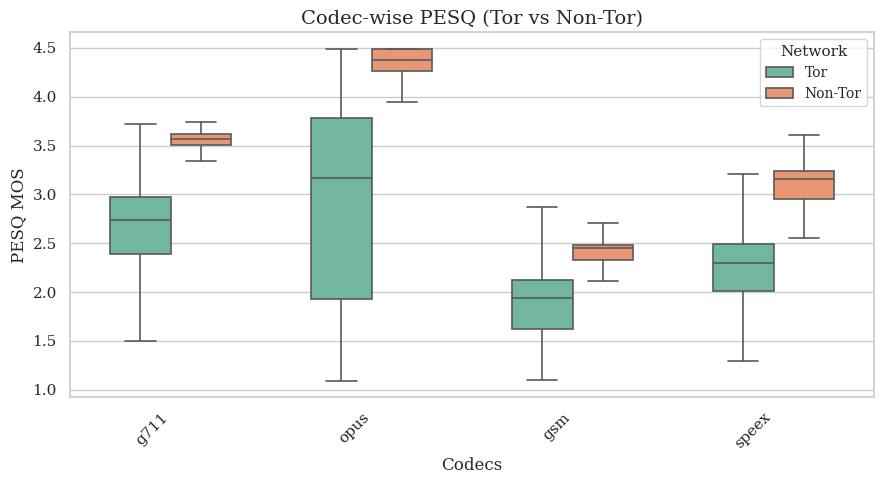


Saved plot as 'codecwise_pesq_tor_vs_nontor_boxplot.pdf'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# === CONFIGURE FOR ACADEMIC QUALITY PLOT ===
rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "pdf.fonttype": 42,
})

# === FILE PATHS ===
file_tor = "../../data/final-tor-2.csv"
file_non_tor = "../../data/final-non-tor.csv"

# === FUNCTION: Load and clean PESQ data ===
def load_clean_pesq(filepath, label):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    pesq_df = pd.DataFrame()
    pesq_df['codec'] = df['codec']
    pesq_df['pesq'] = pd.concat([df['caller_pesq_mos'], df['callee_pesq_mos']], ignore_index=True)
    pesq_df['codec'] = pesq_df['codec'].ffill()
    pesq_df = pesq_df.dropna()
    pesq_df = pesq_df[pesq_df['pesq'] > 0]
    pesq_df['network'] = label
    return pesq_df

# === LOAD DATA ===
df_tor = load_clean_pesq(file_tor, "Tor")
df_non_tor = load_clean_pesq(file_non_tor, "Non-Tor")
df_combined = pd.concat([df_tor, df_non_tor], ignore_index=True)

# === CODEC-WISE STATS ===
print("=== Codec-wise PESQ Statistics ===")
all_codecs = sorted(df_combined['codec'].unique())

for codec in all_codecs:
    for network in ["Tor", "Non-Tor"]:
        subset = df_combined[(df_combined['codec'] == codec) & (df_combined['network'] == network)]
        total = len(subset)
        above_3 = (subset['pesq'] > 3.0).sum()
        pct_above_3 = (above_3 / total) * 100 if total > 0 else 0

        print(f"{codec} ({network}):")
        print(f"  Total calls     : {total}")
        print(f"  >3.0 PESQ       : {above_3} ({pct_above_3:.2f}%)")
        print(f"  Mean PESQ       : {subset['pesq'].mean():.2f}")
        print(f"  Q1-Q2-Q3        : {subset['pesq'].quantile(0.25):.2f}, {subset['pesq'].median():.2f}, {subset['pesq'].quantile(0.75):.2f}")
        print()

# === PLOT ===
plt.figure(figsize=(9, 5))
sns.set(style="whitegrid", font="serif", rc={"axes.titlesize": 14})

ax = sns.boxplot(
    data=df_combined,
    x="codec",
    y="pesq",
    hue="network",
    palette="Set2",
    width=0.6,
    linewidth=1.2,
    showfliers=False   # << suppress outliers
)

ax.set_ylabel("PESQ MOS")
ax.set_xlabel("Codecs")
ax.set_title("Codec-wise PESQ (Tor vs Non-Tor)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Network", loc="upper right", fontsize=10, title_fontsize=11)
plt.tight_layout()

# === SAVE ===
plt.savefig("codecwise_pesq_tor_vs_nontor_boxplot.pdf", format="pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()
plt.close()

print("\nSaved plot as 'codecwise_pesq_tor_vs_nontor_boxplot.pdf'")
